In [1]:
import numpy as np
import pandas
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pandas.read_csv("Data/spaceship-titanic/train.csv")
df = df.dropna()
df["CryoSleep"] = df["CryoSleep"].astype(int)
df["VIP"] = df["VIP"].astype(int)
df["Transported"] = df["Transported"].astype(int)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [3]:
corr_matrix = df.corr()
corr_matrix

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,1.000000,-0.085701,-0.082303,-0.255398,-0.210782,-0.228612,-0.202216,-0.199095,0.462803
Age,-0.085701,1.000000,0.098138,0.074783,0.135844,0.042314,0.123820,0.105031,-0.082553
VIP,-0.082303,0.098138,1.000000,0.029009,0.135386,0.013660,0.064792,0.130061,-0.042260
RoomService,-0.255398,0.074783,0.029009,1.000000,-0.013614,0.060478,0.012472,-0.026002,-0.247291
FoodCourt,-0.210782,0.135844,0.135386,-0.013614,1.000000,-0.012320,0.215995,0.216997,0.055025
ShoppingMall,-0.228612,0.042314,0.013660,0.060478,-0.012320,1.000000,0.022168,0.000383,0.011602
Spa,-0.202216,0.123820,0.064792,0.012472,0.215995,0.022168,1.000000,0.149447,-0.219854
VRDeck,-0.199095,0.105031,0.130061,-0.026002,0.216997,0.000383,0.149447,1.000000,-0.207950
Transported,0.462803,-0.082553,-0.042260,-0.247291,0.055025,0.011602,-0.219854,-0.207950,1.000000


As we can see room service, spa and vr deck is inversely correlated most with transported. Shopping mall iss the least.
After adding Cryosleep it seem it is a great factor in if a person was transported.

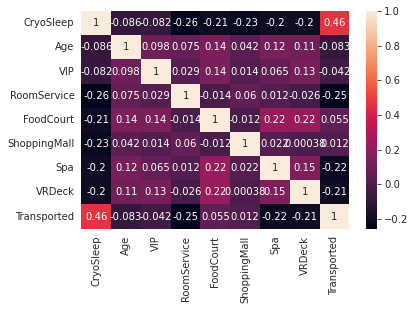

In [4]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [5]:
df = df.dropna()

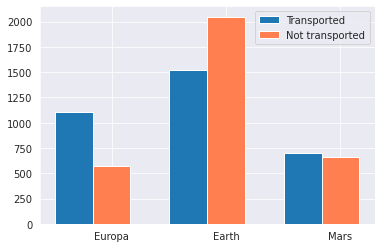

In [6]:
home_planets_transported = [df.loc[(df["HomePlanet"] == name) & (df["Transported"] == 1)]["Transported"].count() for name in df["HomePlanet"].unique()]
home_planets_not_transported = [df.loc[(df["HomePlanet"] == name) & (df["Transported"] == 0)]["Transported"].count() for name in df["HomePlanet"].unique()]
X = np.arange(3)
plt.bar(X, home_planets_transported, tick_label=df["HomePlanet"].unique(), width=0.33, label="Transported")
plt.bar(X + 0.33, home_planets_not_transported,color="coral", tick_label=df["HomePlanet"].unique(), width=0.33, label="Not transported")
plt.legend()
plt.show()


Being from Europa seem like a larger part was transported

In [7]:
home_planet_onehot = pd.get_dummies(df.HomePlanet, prefix="HP")
home_planet_onehot
#TODO add onehot column

,HP_Earth,HP_Europa,HP_Mars
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
8688,0,1,0
8689,1,0,0
8690,1,0,0
8691,0,1,0


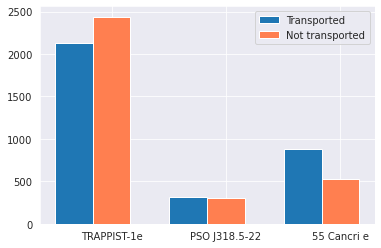

In [8]:
destination_transported = [df.loc[(df["Destination"] == name) & (df["Transported"] == 1)]["Transported"].count() for name in df["Destination"].unique()]
destination_not_transported = [df.loc[(df["Destination"] == name) & (df["Transported"] == 0)]["Transported"].count() for name in df["Destination"].unique()]
X = np.arange(3)
plt.bar(X, destination_transported, tick_label=df["Destination"].unique(), width=0.33, label="Transported")
plt.bar(X + 0.33, destination_not_transported,color="coral", tick_label=df["Destination"].unique(), width=0.33, label="Not transported")
plt.legend()
plt.show()

Looks Like destination does not affect if a passenger was transported too much

In [9]:
destination_onehot = pd.get_dummies(df.Destination, prefix="Destination")
destination_onehot

,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
8688,1,0,0
8689,0,1,0
8690,0,0,1
8691,1,0,0


In [10]:
cabin_deck = [cabin[0] for cabin in df["Cabin"]]
df_deck = pd.DataFrame({"deck": cabin_deck})
cabin_deck_onehot = pd.get_dummies(cabin_deck, prefix="Deck")
cabin_deck_onehot
df_deck

,deck
0,B
1,F
2,A
3,A
4,F
...,...
6601,A
6602,G
6603,G
6604,E


In [11]:
deck_transported = [df.loc[(df_deck["deck"] == name) & (df["Transported"] == 1)]["Transported"].count() for name in df_deck["deck"].unique()]
deck_not_transported = [df.loc[(df_deck["deck"] == name) & (df["Transported"] == 0)]["Transported"].count() for name in df_deck["deck"].unique()]

In [12]:
deck_transported

[272, 803, 68, 769, 271, 224, 143, 0]

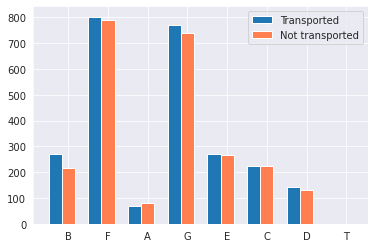

In [13]:

X = np.arange(df_deck["deck"].unique().shape[0])
plt.bar(X, deck_transported, tick_label=df_deck["deck"].unique(), width=0.33, label="Transported")
plt.bar(X + 0.33, deck_not_transported,color="coral", tick_label=df_deck["deck"].unique(), width=0.33, label="Not transported")
plt.legend()
plt.show()

In [14]:
cabin_number = [cabin.split('/')[1] for cabin in df["Cabin"]]
df_nr = pd.DataFrame({"nr": cabin_number})
cabin_number_onehot = pd.get_dummies(cabin_number, prefix="CNr")
cabin_number_onehot
df_nr

,nr
0,0
1,0
2,0
3,0
4,1
...,...
6601,98
6602,1499
6603,1500
6604,608


In [15]:
cabin_side = [cabin.split('/')[2] for cabin in df["Cabin"]]
cabin_side_onehot = pd.get_dummies(cabin_side, prefix="Side")
cabin_side_onehot
df_side = pd.DataFrame({"side": cabin_side})
df_side


,side
0,P
1,S
2,S
3,S
4,S
...,...
6601,P
6602,S
6603,S
6604,S


In [16]:
side_transported = [df.loc[(df_side["side"] == name) & (df["Transported"] == 1)]["Transported"].count() for name in df_side["side"].unique()]
side_not_transported = [df.loc[(df_side["side"] == name) & (df["Transported"] == 0)]["Transported"].count() for name in df_side["side"].unique()]

In [17]:
side_transported

[1257, 1293]

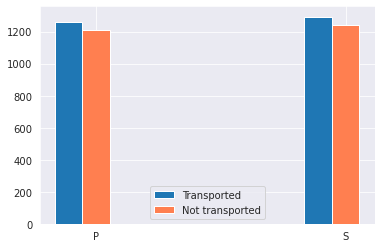

In [18]:
X = np.arange(df_side["side"].unique().shape[0]) * 3
plt.bar(X, side_transported, tick_label=df_side["side"].unique(), width=0.33, label="Transported")
plt.bar(X + 0.33, side_not_transported,color="coral", tick_label=df_side["side"].unique(), width=0.33, label="Not transported")
plt.legend()
plt.show()

In [19]:
df_data = df.drop("HomePlanet", axis=1)
df_data = df_data.join(home_planet_onehot)
df_data

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HP_Earth,HP_Europa,HP_Mars
0,0001_01,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,1,0
1,0002_01,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,1,0,0
2,0003_01,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0,1,0
3,0003_02,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0,1,0
4,0004_01,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,0,1,0
8689,9278_01,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,1,0,0
8690,9279_01,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,1,0,0
8691,9280_01,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,0,1,0


In [20]:
df_data = df_data.drop("Destination", axis=1)
df_data = df_data.drop("Cabin", axis=1)
df_data = df_data.drop("Name", axis=1)

df_data = df_data.join(destination_onehot)
df_data

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HP_Earth,HP_Europa,HP_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,0,1
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,0,1
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,0,1
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,1,0,1,0,0
8689,9278_01,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0
8690,9279_01,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1,0,0,0,0,1
8691,9280_01,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0,1,0,1,0,0


In [21]:
temp_cols=df_data.columns.tolist()
index=df_data.columns.get_loc("Transported")
new_cols=temp_cols[index:index+1] + temp_cols[0:index] + temp_cols[index+1:]
df_data = df_data[new_cols]
df_data

,Transported,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HP_Earth,HP_Europa,HP_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1
1,1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1
2,0,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1
3,0,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1
4,1,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,9276_01,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,1,0,1,0,0
8689,0,9278_01,1,18.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0
8690,1,9279_01,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,0,0,0,0,1
8691,0,9280_01,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,1,0,0


In [22]:
corr_matrix = df_data.corr()
corr_matrix

,Transported,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HP_Earth,HP_Europa,HP_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
Transported,1.000000,0.462803,-0.082553,-0.042260,-0.247291,0.055025,0.011602,-0.219854,-0.207950,-0.168845,0.182004,0.012357,0.123783,0.001281,-0.110655
CryoSleep,0.462803,1.000000,-0.085701,-0.082303,-0.255398,-0.210782,-0.228612,-0.202216,-0.199095,-0.107303,0.097172,0.027704,0.063681,0.093287,-0.115603
Age,-0.082553,-0.085701,1.000000,0.098138,0.074783,0.135844,0.042314,0.123820,0.105031,-0.211611,0.227537,0.016093,0.018652,-0.024093,-0.001289
VIP,-0.042260,-0.082303,0.098138,1.000000,0.029009,0.135386,0.013660,0.064792,0.130061,-0.171725,0.155231,0.044640,0.044215,-0.000931,-0.038647
RoomService,-0.247291,-0.255398,0.074783,0.029009,1.000000,-0.013614,0.060478,0.012472,-0.026002,-0.142515,-0.084779,0.266348,-0.033266,-0.061899,0.068730
FoodCourt,0.055025,-0.210782,0.135844,0.135386,-0.013614,1.000000,-0.012320,0.215995,0.216997,-0.220969,0.374625,-0.130290,0.133108,-0.066713,-0.075860
ShoppingMall,0.011602,-0.228612,0.042314,0.013660,0.060478,-0.012320,1.000000,0.022168,0.000383,-0.082129,-0.024580,0.127432,-0.009219,-0.034535,0.030057
Spa,-0.219854,-0.202216,0.123820,0.064792,0.012472,0.215995,0.022168,1.000000,0.149447,-0.160363,0.266354,-0.088629,0.077554,-0.055403,-0.033725
VRDeck,-0.207950,-0.199095,0.105031,0.130061,-0.026002,0.216997,0.000383,0.149447,1.000000,-0.158738,0.290047,-0.116061,0.090918,-0.047422,-0.050640
HP_Earth,-0.168845,-0.107303,-0.211611,-0.171725,-0.142515,-0.220969,-0.082129,-0.160363,-0.158738,1.000000,-0.630734,-0.553240,-0.153941,0.240784,-0.015918


<AxesSubplot:>

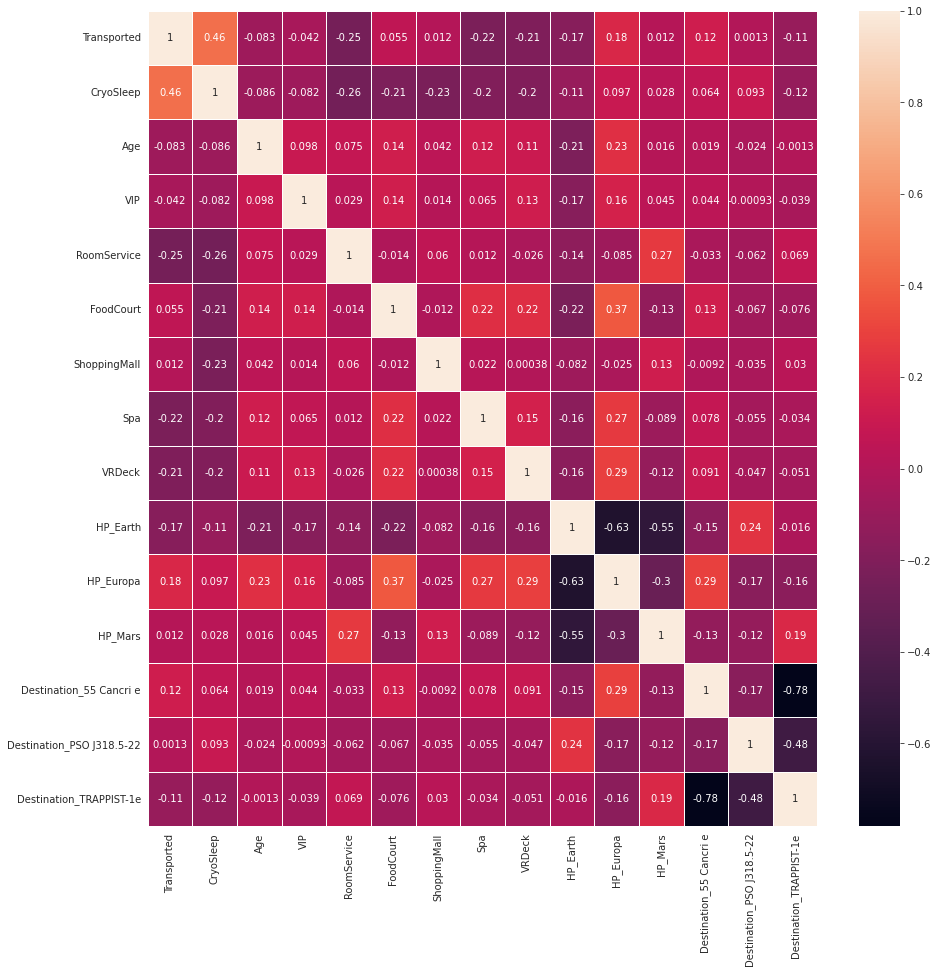

In [23]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)

In [24]:
x_ticks = corr_matrix.iloc[0].index
values = corr_matrix.iloc[0].array
values

<PandasArray>
[                 1.0,    0.462803482153566, -0.08255287690970188,
 -0.04226002786876545,  -0.2472907818370831, 0.055024650480644324,
 0.011601728883922309,  -0.2198542639203338, -0.20794964666038315,
 -0.16884541176979168,    0.182003559281146,  0.01235664538215928,
  0.12378258805434082,    0.001281056435556, -0.11065527046207708]
Length: 15, dtype: float64

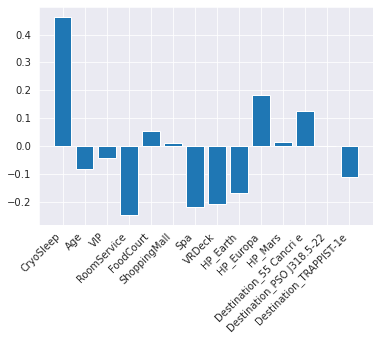

In [25]:
plt.bar(x_ticks[1:], values[1:])
plt.xticks(rotation=45, ha="right")
plt.show()

Here we can see a bar chart over the values that affects the transported result the most.


In [26]:
zipped_array = zip(x_ticks[1:], values[1:])
sorted_best_features = list(reversed(sorted(zipped_array, key=lambda x: abs(x[1]))))
sorted_best_features

[('CryoSleep', 0.462803482153566),
 ('RoomService', -0.2472907818370831),
 ('Spa', -0.2198542639203338),
 ('VRDeck', -0.20794964666038315),
 ('HP_Europa', 0.182003559281146),
 ('HP_Earth', -0.16884541176979168),
 ('Destination_55 Cancri e', 0.12378258805434082),
 ('Destination_TRAPPIST-1e', -0.11065527046207708),
 ('Age', -0.08255287690970188),
 ('FoodCourt', 0.055024650480644324),
 ('VIP', -0.04226002786876545),
 ('HP_Mars', 0.01235664538215928),
 ('ShoppingMall', 0.011601728883922309),
 ('Destination_PSO J318.5-22', 0.001281056435556)]

In [27]:
df = pandas.read_csv("Data/spaceship-titanic/train.csv")
df["CryoSleep"].fillna(df["CryoSleep"].mode()[0], inplace=True)
df["VIP"].fillna(df["VIP"].mode()[0], inplace=True)
df["HomePlanet"].fillna(df["HomePlanet"].mode()[0], inplace=True)
df["Destination"].fillna(df["Destination"].mode()[0], inplace=True)
df["RoomService"].fillna(df["RoomService"].mode()[0], inplace=True)
df["Spa"].fillna(df["Spa"].mode()[0], inplace=True)
df["VRDeck"].fillna(df["VRDeck"].mode()[0], inplace=True)
df["Age"].fillna(df["Age"].mode()[0], inplace=True)
df["FoodCourt"].fillna(df["FoodCourt"].mode()[0], inplace=True)
df["ShoppingMall"].fillna(df["ShoppingMall"].mode()[0], inplace=True)

home_planet_onehot = pd.get_dummies(df.HomePlanet, prefix="HP")

destination_onehot = pd.get_dummies(df.Destination, prefix="Destination")

df_data = df.drop("HomePlanet", axis=1)
df_data = df_data.drop("Destination", axis=1)
df_data = df_data.drop("Cabin", axis=1)
df_data = df_data.drop("Name", axis=1)

df_data = df_data.join(home_planet_onehot)
df_data = df_data.join(destination_onehot)
data = df_data.drop(['Destination_PSO J318.5-22'], axis=1)

x_total = data.drop(['Transported', 'PassengerId'], axis=1)
y_total = data["Transported"]
train, val = train_test_split(data, test_size=0.15, random_state=27, shuffle=True)
x_train, y_train = train.drop(['Transported', 'PassengerId'], axis=1), train['Transported']
x_val, y_val = val.drop(['Transported', 'PassengerId'], axis=1), val['Transported']
x_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HP_Earth,HP_Europa,HP_Mars,Destination_55 Cancri e,Destination_TRAPPIST-1e
3263,False,38.0,False,0.0,1025.0,23.0,0.0,0.0,1,0,0,0,1
6081,True,16.0,False,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
6000,False,14.0,False,0.0,973.0,0.0,1.0,0.0,1,0,0,1,0
40,True,30.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
1241,True,21.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,False,24.0,False,812.0,5450.0,0.0,1.0,262.0,0,1,0,0,1
4848,True,44.0,False,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
3912,False,4.0,False,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
3768,True,29.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0


In [28]:
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn import svm

clf_gbc = GradientBoostingClassifier(random_state=27).fit(x_train, y_train)
clf_gbc.score(x_val, y_val)

0.7875766871165644

In [29]:
clf_svm = svm.SVC().fit(x_train, y_train)
clf_svm.score(x_val, y_val)


0.7745398773006135

In [30]:
clf_bc = BaggingClassifier(random_state=27).fit(x_train, y_train)
clf_bc.score(x_val, y_val)

0.7837423312883436

In [31]:
clf_rf = RandomForestClassifier(random_state=27).fit(x_train, y_train)
clf_rf.score(x_val, y_val)

0.7898773006134969

In [32]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier(random_state=27).fit(x_train, y_train)
clf_xgb.score(x_val, y_val)

[07:29:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/erik/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/erik/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/erik/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, p

0.7883435582822086

In [33]:
df = pandas.read_csv("Data/spaceship-titanic/test.csv")
df["CryoSleep"].fillna(df["CryoSleep"].mode()[0], inplace=True)
df["VIP"].fillna(df["VIP"].mode()[0], inplace=True)
df["HomePlanet"].fillna(df["HomePlanet"].mode()[0], inplace=True)
df["Destination"].fillna(df["Destination"].mode()[0], inplace=True)
df["RoomService"].fillna(df["RoomService"].mode()[0], inplace=True)
df["Spa"].fillna(df["Spa"].mode()[0], inplace=True)
df["VRDeck"].fillna(df["VRDeck"].mode()[0], inplace=True)
df["Age"].fillna(df["Age"].mode()[0], inplace=True)
df["FoodCourt"].fillna(df["FoodCourt"].mode()[0], inplace=True)
df["ShoppingMall"].fillna(df["ShoppingMall"].mode()[0], inplace=True)

home_planet_onehot = pd.get_dummies(df.HomePlanet, prefix="HP")

destination_onehot = pd.get_dummies(df.Destination, prefix="Destination")

df_data = df.drop("HomePlanet", axis=1)
df_data = df_data.drop("Destination", axis=1)
df_data = df_data.drop("Cabin", axis=1)
df_data = df_data.drop("Name", axis=1)

df_data = df_data.join(home_planet_onehot)
df_data = df_data.join(destination_onehot)
data = df_data.drop(['Destination_PSO J318.5-22', 'PassengerId'], axis=1)


In [34]:
clf_xgb = xgb.XGBClassifier(random_state=27).fit(x_total, y_total)

/home/erik/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/erik/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[07:29:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [35]:
Y = clf_xgb.predict(data)


In [36]:
result = {'PassengerId': df_data['PassengerId'].values, 'Transported': Y}
result = pd.DataFrame(result)
result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [37]:
result.to_csv("SpaceTitanicRes", index=False)